## Building a Content Based Recommendation System for HealthCare Startup Companies

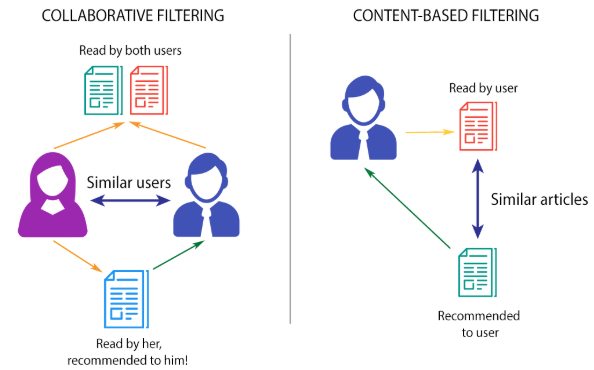

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
import re

In [3]:
xl = pd.ExcelFile('data_for_content_based - Ext.xlsx')
df = xl.parse('Sheet1')
df.head()


,id,Name,Year,Ratings,Industry,Location,No. of Employees,Overview
0,1,Acclinate Genetics,2018,3.0,Boitechnology,"Huntsville, AL",2-10,"We provide biopharmaceutical companies, contra..."
1,2,Activ Surgical,2017,5.0,Medical Device,"Boston, MA",11-50,Activ Surgical is focused on providing global ...
2,3,AIM Medical Robotics,2018,5.0,Automation in Healthcare,"Greater Miami, FL",2-10,We are developing a robotic system for use in ...
3,4,AMChart,2017,5.0,Hospital IT & Services,"Austin, TX",11-50,The AmChart platform was created to bring thes...
4,5,AngioInsight Inc,2018,4.5,AI Service in Helthcare,"Ann Arbor, MN",2-10,AngioInsight is a seed-stage start-up bringing...


In [4]:

print("companies Dataframe:",df.shape)

companies Dataframe: (39, 8)


In [5]:
df = df.drop(columns=['Year', 'Ratings', 'No. of Employees', 'Industry'])
df.head()


,id,Name,Location,Overview
0,1,Acclinate Genetics,"Huntsville, AL","We provide biopharmaceutical companies, contra..."
1,2,Activ Surgical,"Boston, MA",Activ Surgical is focused on providing global ...
2,3,AIM Medical Robotics,"Greater Miami, FL",We are developing a robotic system for use in ...
3,4,AMChart,"Austin, TX",The AmChart platform was created to bring thes...
4,5,AngioInsight Inc,"Ann Arbor, MN",AngioInsight is a seed-stage start-up bringing...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        39 non-null     int64 
 1   Name      39 non-null     object
 2   Location  39 non-null     object
 3   Overview  39 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.3+ KB


In [10]:
# Remove punctuations
def remove_punct(text):   
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Txt_punct'] = df['Overview'].apply(lambda x: remove_punct(x))
df.head(10)


,id,Name,Location,Overview,Txt_punct
0,1,Acclinate Genetics,"Huntsville, AL","We provide biopharmaceutical companies, contra...",We provide biopharmaceutical companies contrac...
1,2,Activ Surgical,"Boston, MA",Activ Surgical is focused on providing global ...,Activ Surgical is focused on providing global ...
2,3,AIM Medical Robotics,"Greater Miami, FL",We are developing a robotic system for use in ...,We are developing a robotic system for use in ...
3,4,AMChart,"Austin, TX",The AmChart platform was created to bring thes...,The AmChart platform was created to bring thes...
4,5,AngioInsight Inc,"Ann Arbor, MN",AngioInsight is a seed-stage start-up bringing...,AngioInsight is a seedstage startup bringing t...
5,6,AniCell Biotech,"Chandler, AR",It uses provisionally-patented collection and ...,It uses provisionallypatented collection and p...
6,7,Appairy Medical,British Columbia,Appairy has advanced cardiac monitoring system...,Appairy has advanced cardiac monitoring system...
7,8,ARIZ Precision Medicine,"Davis, CA",ARIZ Precision Medicine (ARIZ) is developing p...,ARIZ Precision Medicine ARIZ is developing pot...
8,9,Articulate Labs,"Dallas, TX","Articulate Labs has developed KneeStim(TM), a ...",Articulate Labs has developed KneeStimTM a med...
9,10,Avitus Orthopaedics,"Shelton, CT","Avitus Orthopaedics, Inc. is a medical device ...",Avitus Orthopaedics Inc is a medical device st...


In [11]:
# Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Txt_tokenized'] = df['Txt_punct'].apply(lambda x: tokenization(x.lower()))
df.head()


,id,Name,Location,Overview,Txt_punct,Txt_tokenized
0,1,Acclinate Genetics,"Huntsville, AL","We provide biopharmaceutical companies, contra...",We provide biopharmaceutical companies contrac...,"[we, provide, biopharmaceutical, companies, co..."
1,2,Activ Surgical,"Boston, MA",Activ Surgical is focused on providing global ...,Activ Surgical is focused on providing global ...,"[activ, surgical, is, focused, on, providing, ..."
2,3,AIM Medical Robotics,"Greater Miami, FL",We are developing a robotic system for use in ...,We are developing a robotic system for use in ...,"[we, are, developing, a, robotic, system, for,..."
3,4,AMChart,"Austin, TX",The AmChart platform was created to bring thes...,The AmChart platform was created to bring thes...,"[the, amchart, platform, was, created, to, bri..."
4,5,AngioInsight Inc,"Ann Arbor, MN",AngioInsight is a seed-stage start-up bringing...,AngioInsight is a seedstage startup bringing t...,"[angioinsight, is, a, seedstage, startup, brin..."


In [13]:
# Remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text
    
df['Txt_nonstop'] = df['Txt_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)


,id,Name,Location,Overview,Txt_punct,Txt_tokenized,Txt_nonstop
0,1,Acclinate Genetics,"Huntsville, AL","We provide biopharmaceutical companies, contra...",We provide biopharmaceutical companies contrac...,"[we, provide, biopharmaceutical, companies, co...","[provide, biopharmaceutical, companies, contra..."
1,2,Activ Surgical,"Boston, MA",Activ Surgical is focused on providing global ...,Activ Surgical is focused on providing global ...,"[activ, surgical, is, focused, on, providing, ...","[activ, surgical, focused, providing, global, ..."
2,3,AIM Medical Robotics,"Greater Miami, FL",We are developing a robotic system for use in ...,We are developing a robotic system for use in ...,"[we, are, developing, a, robotic, system, for,...","[developing, robotic, system, use, neurosurgic..."
3,4,AMChart,"Austin, TX",The AmChart platform was created to bring thes...,The AmChart platform was created to bring thes...,"[the, amchart, platform, was, created, to, bri...","[amchart, platform, created, bring, datasets, ..."
4,5,AngioInsight Inc,"Ann Arbor, MN",AngioInsight is a seed-stage start-up bringing...,AngioInsight is a seedstage startup bringing t...,"[angioinsight, is, a, seedstage, startup, brin...","[angioinsight, seedstage, startup, bringing, b..."
5,6,AniCell Biotech,"Chandler, AR",It uses provisionally-patented collection and ...,It uses provisionallypatented collection and p...,"[it, uses, provisionallypatented, collection, ...","[uses, provisionallypatented, collection, proc..."
6,7,Appairy Medical,British Columbia,Appairy has advanced cardiac monitoring system...,Appairy has advanced cardiac monitoring system...,"[appairy, has, advanced, cardiac, monitoring, ...","[appairy, advanced, cardiac, monitoring, syste..."
7,8,ARIZ Precision Medicine,"Davis, CA",ARIZ Precision Medicine (ARIZ) is developing p...,ARIZ Precision Medicine ARIZ is developing pot...,"[ariz, precision, medicine, ariz, is, developi...","[ariz, precision, medicine, ariz, developing, ..."
8,9,Articulate Labs,"Dallas, TX","Articulate Labs has developed KneeStim(TM), a ...",Articulate Labs has developed KneeStimTM a med...,"[articulate, labs, has, developed, kneestimtm,...","[articulate, labs, developed, kneestimtm, medi..."
9,10,Avitus Orthopaedics,"Shelton, CT","Avitus Orthopaedics, Inc. is a medical device ...",Avitus Orthopaedics Inc is a medical device st...,"[avitus, orthopaedics, inc, is, a, medical, de...","[avitus, orthopaedics, inc, medical, device, s..."


In [14]:
ps = nltk.PorterStemmer()
def word_stemmer(text):
    stem_text = " ".join([i for i in text])
    return stem_text

df['cleaned_overview'] = df['Txt_nonstop'].apply(lambda x: word_stemmer(x))
df.head(10)

,id,Name,Location,Overview,Txt_punct,Txt_tokenized,Txt_nonstop,cleaned_overview
0,1,Acclinate Genetics,"Huntsville, AL","We provide biopharmaceutical companies, contra...",We provide biopharmaceutical companies contrac...,"[we, provide, biopharmaceutical, companies, co...","[provide, biopharmaceutical, companies, contra...",provide biopharmaceutical companies contract r...
1,2,Activ Surgical,"Boston, MA",Activ Surgical is focused on providing global ...,Activ Surgical is focused on providing global ...,"[activ, surgical, is, focused, on, providing, ...","[activ, surgical, focused, providing, global, ...",activ surgical focused providing global access...
2,3,AIM Medical Robotics,"Greater Miami, FL",We are developing a robotic system for use in ...,We are developing a robotic system for use in ...,"[we, are, developing, a, robotic, system, for,...","[developing, robotic, system, use, neurosurgic...",developing robotic system use neurosurgical pr...
3,4,AMChart,"Austin, TX",The AmChart platform was created to bring thes...,The AmChart platform was created to bring thes...,"[the, amchart, platform, was, created, to, bri...","[amchart, platform, created, bring, datasets, ...",amchart platform created bring datasets market...
4,5,AngioInsight Inc,"Ann Arbor, MN",AngioInsight is a seed-stage start-up bringing...,AngioInsight is a seedstage startup bringing t...,"[angioinsight, is, a, seedstage, startup, brin...","[angioinsight, seedstage, startup, bringing, b...",angioinsight seedstage startup bringing benefi...
5,6,AniCell Biotech,"Chandler, AR",It uses provisionally-patented collection and ...,It uses provisionallypatented collection and p...,"[it, uses, provisionallypatented, collection, ...","[uses, provisionallypatented, collection, proc...",uses provisionallypatented collection processi...
6,7,Appairy Medical,British Columbia,Appairy has advanced cardiac monitoring system...,Appairy has advanced cardiac monitoring system...,"[appairy, has, advanced, cardiac, monitoring, ...","[appairy, advanced, cardiac, monitoring, syste...",appairy advanced cardiac monitoring systems co...
7,8,ARIZ Precision Medicine,"Davis, CA",ARIZ Precision Medicine (ARIZ) is developing p...,ARIZ Precision Medicine ARIZ is developing pot...,"[ariz, precision, medicine, ariz, is, developi...","[ariz, precision, medicine, ariz, developing, ...",ariz precision medicine ariz developing potent...
8,9,Articulate Labs,"Dallas, TX","Articulate Labs has developed KneeStim(TM), a ...",Articulate Labs has developed KneeStimTM a med...,"[articulate, labs, has, developed, kneestimtm,...","[articulate, labs, developed, kneestimtm, medi...",articulate labs developed kneestimtm medical d...
9,10,Avitus Orthopaedics,"Shelton, CT","Avitus Orthopaedics, Inc. is a medical device ...",Avitus Orthopaedics Inc is a medical device st...,"[avitus, orthopaedics, inc, is, a, medical, de...","[avitus, orthopaedics, inc, medical, device, s...",avitus orthopaedics inc medical device startup...


(-0.5, 399.5, 199.5, -0.5)

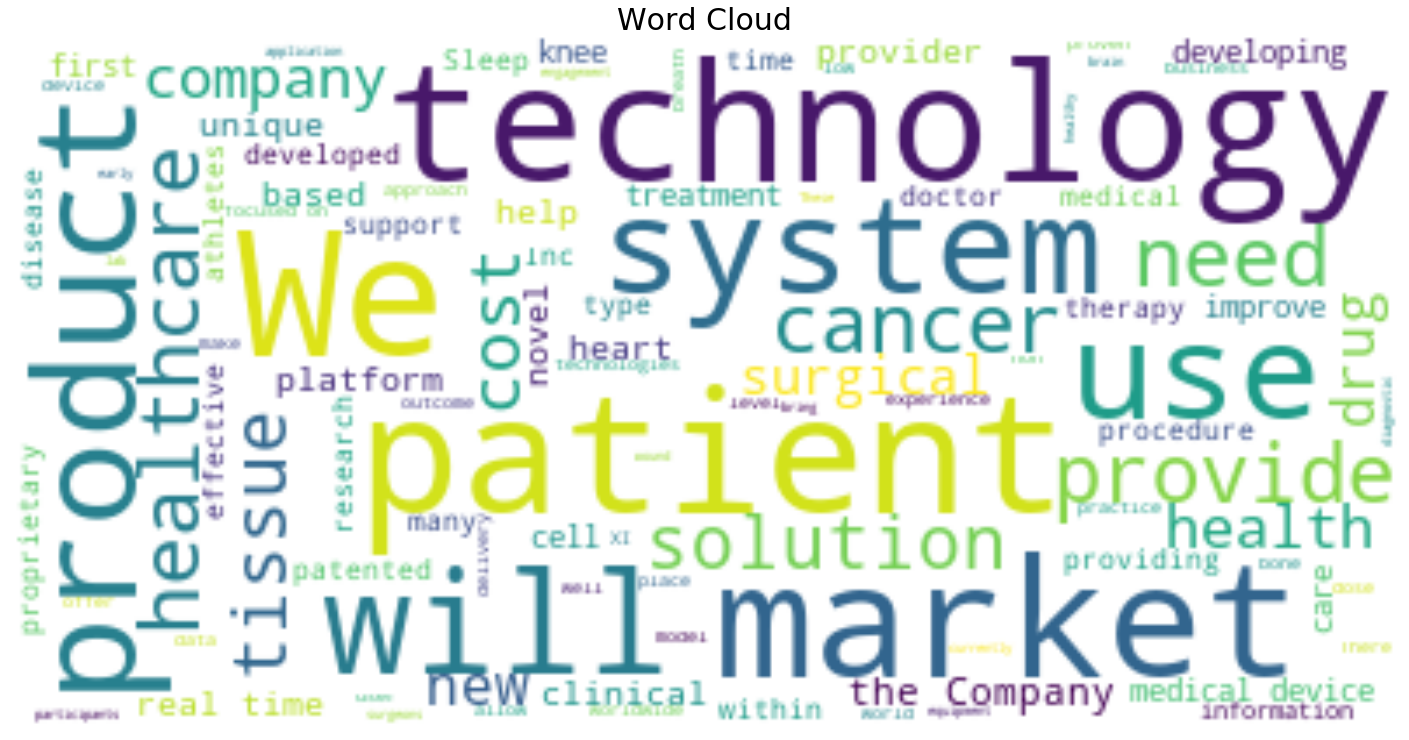

In [15]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

fig, ax = plt.subplots(1, 1, figsize  = (25,25))

textAll = " ".join(review for review in df.Overview)

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(textAll)

ax.imshow(wordcloud_ALL, interpolation='bilinear')
ax.set_title('Word Cloud', fontsize=30)
ax.axis('off')

### Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [16]:
cleaned_df = df
cleaned_df['Overview'] = df['cleaned_overview']
cleaned_df.head(1)['Overview']

0    provide biopharmaceutical companies contract r...
Name: Overview, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
cleaned_df['Overview'] = cleaned_df['Overview'].fillna('')

In [18]:
# Fitting the TF-IDF on the 'Overview' text
tfv_matrix = tfv.fit_transform(cleaned_df['Overview'])

In [19]:
tfv_matrix

<39x124 sparse matrix of type '<class 'numpy.float64'>'
	with 562 stored elements in Compressed Sparse Row format>

In [20]:
tfv_matrix.shape

(39, 124)

In [21]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [22]:
sig[0]

array([0.7649603 , 0.76167803, 0.76174445, 0.76218942, 0.76246019,
       0.76168657, 0.76164224, 0.76216154, 0.76167968, 0.76218135,
       0.76186576, 0.76252124, 0.7616488 , 0.76183343, 0.76159416,
       0.76166975, 0.76159416, 0.76159416, 0.76171772, 0.76227358,
       0.76159416, 0.76159416, 0.76166007, 0.76166621, 0.76179561,
       0.76218261, 0.7619146 , 0.76189887, 0.76205957, 0.76167426,
       0.76182155, 0.76171698, 0.76228228, 0.76183623, 0.76159416,
       0.76183729, 0.76159416, 0.76180762, 0.76196354])

In [26]:
# Reverse mapping of indices and movie titles
indices = pd.Series(cleaned_df.index, index=cleaned_df['Name']).drop_duplicates()
indices.head()

Name
Acclinate Genetics      0
Activ Surgical          1
AIM Medical Robotics    2
AMChart                 3
AngioInsight Inc        4
dtype: int64

In [27]:
company = 'CareSuites'
index_no = indices[company]
index_no

15

In [28]:
sig[index_no]

array([0.76166975, 0.76197134, 0.76190332, 0.76224745, 0.76177522,
       0.7617434 , 0.76213892, 0.76159416, 0.76170867, 0.76159416,
       0.76205005, 0.76187918, 0.76177634, 0.76168739, 0.76159416,
       0.7649603 , 0.76177882, 0.7623769 , 0.76206814, 0.76257283,
       0.76209961, 0.76159416, 0.76159416, 0.76159416, 0.76171513,
       0.76168998, 0.76170272, 0.76159416, 0.76168798, 0.76174577,
       0.76214932, 0.76222733, 0.76190617, 0.76184222, 0.7616884 ,
       0.76159416, 0.76205898, 0.76179116, 0.76196723])

In [29]:
list(enumerate(sig[indices[company]]))

[(0, 0.7616697465416131),
 (1, 0.7619713364883663),
 (2, 0.7619033228949184),
 (3, 0.7622474517206358),
 (4, 0.7617752178614239),
 (5, 0.7617433978210391),
 (6, 0.7621389220398157),
 (7, 0.7615941559557649),
 (8, 0.7617086665443196),
 (9, 0.7615941559557649),
 (10, 0.7620500547470184),
 (11, 0.7618791771969526),
 (12, 0.7617763351696042),
 (13, 0.7616873920664495),
 (14, 0.7615941559557649),
 (15, 0.7649602983630058),
 (16, 0.7617788191679945),
 (17, 0.7623769026351848),
 (18, 0.7620681439987322),
 (19, 0.7625728315940541),
 (20, 0.7620996146939945),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (24, 0.7617151312445486),
 (25, 0.7616899811701587),
 (26, 0.7617027171914853),
 (27, 0.7615941559557649),
 (28, 0.7616879770418454),
 (29, 0.7617457735382034),
 (30, 0.7621493162246756),
 (31, 0.7622273311648894),
 (32, 0.7619061716398632),
 (33, 0.7618422182834024),
 (34, 0.7616883998564108),
 (35, 0.7615941559557649),
 (36, 0.7620589777381779),
 (37, 0.761

In [30]:
sorted(list(enumerate(sig[indices[company]])), key=lambda x: x[1], reverse=True)

[(15, 0.7649602983630058),
 (19, 0.7625728315940541),
 (17, 0.7623769026351848),
 (3, 0.7622474517206358),
 (31, 0.7622273311648894),
 (30, 0.7621493162246756),
 (6, 0.7621389220398157),
 (20, 0.7620996146939945),
 (18, 0.7620681439987322),
 (36, 0.7620589777381779),
 (10, 0.7620500547470184),
 (1, 0.7619713364883663),
 (38, 0.7619672288591862),
 (32, 0.7619061716398632),
 (2, 0.7619033228949184),
 (11, 0.7618791771969526),
 (33, 0.7618422182834024),
 (37, 0.7617911563600828),
 (16, 0.7617788191679945),
 (12, 0.7617763351696042),
 (4, 0.7617752178614239),
 (29, 0.7617457735382034),
 (5, 0.7617433978210391),
 (24, 0.7617151312445486),
 (8, 0.7617086665443196),
 (26, 0.7617027171914853),
 (25, 0.7616899811701587),
 (34, 0.7616883998564108),
 (28, 0.7616879770418454),
 (13, 0.7616873920664495),
 (0, 0.7616697465416131),
 (7, 0.7615941559557649),
 (9, 0.7615941559557649),
 (14, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615941559557649),
 (27, 0.761

In [31]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the Companies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar Company
    sig_scores = sig_scores[1:11]

    # Company indices
    company_indices = [i[0] for i in sig_scores]

    # Top 10 most similar Companies
    return cleaned_df['Name'].iloc[company_indices] + '       ' + cleaned_df['Location'].iloc[company_indices]

In [32]:
# Testing our content-based recommendation system with some example company 
give_rec('AIM Medical Robotics')

11           Boinca Therapeutics       Philadelphia, PA
3                              AMChart       Austin, TX
13              Breath Diagnostics       Louisville, KY
21            Deep Sleep Boost Inc       Scottsdale, AR
8                      Articulate Labs       Dallas, TX
14                     Brilliantly       Providence, RI
10                 BabyliveAdvice       Los Angeles, CA
17                Clear Protocol       Santa Monica, CA
32          Hyperion Laboratories       Los Angeles, CA
30    Healora DirectPay Healthcare       Santa Monic...
dtype: object